| Autor       | Patrick Michel                                           |
|-------------|----------------------------------------------------------|
| 6. Semester | FFHS - Fernfachhochschule Schweiz                        |
| Fach        | AnPy, Analysis mit Python, BSc INF 2017 Pas, BE1-I, FS20 |
| Dozent      | Geuss Markus                                             |

# Inhaltsverzeichnis

* Einführung
* Aufgabenstellung
* Systemanforderungen
* Riemann-Integral
* Allgemeine Definitionen & visuelle Überprüfung
* Sekantentrapezregel
* Tangententrapezregel
* Simpsonsche Regel
* Vergleich mit verschiedenen Integralen
* Grenzwert n → ∞
* Erkenntnisse & Reflexion
* Verweise

# Einführung

In dieser Arbeit geht es um das numerische Integrieren und somit Bestimmten von Flächen einer Funktion. Dies wird in einem theoretischen Teil beschrieben sowie exemplarisch mit der Programmiersprache Python umgesetzt.

## Aufgabenstellung

1. Beschreiben Sie den Begriff des bestimmten Integrales.
2. Beschreiben Sie die Sekantenzrapezregel, die Tangententrapezregel und die Simpsonsche Regel als Näherungsformel für zur Berechnung bestimmter Integrale.
3. Erstellen Sie drei Python-Funktionen
    * `sekanten_trapez_regel(f, a, b, n)`
    * `tangenten_trapez_regel(f, a, b, n)`
    * `simpson_regel(f, a, b, n)`
    * zur Approximation des Integrals 
\begin{equation}
    \int_{a}^{b} f(x)\, dx
\end{equation}
    * dabei steht n für die Anzahl Streifen (bzw Doppelstreifrn bei Simpson) in den Approximationen.
4. Verwenden Sie die drei Approximationsregeln zur Bestimmung der folgenden Integrale (Varieren Sie dabei die Anzahl Streifen n):  
    
\begin{equation}
    \int_{0}^{\pi} sin(x)\, dx
\end{equation}
    
\begin{equation}
    \int_{-1}^{1} \sqrt{1 - x^{2}}\, dx
\end{equation}
    
\begin{equation}
    \int_{0}^{1} x^{2}\, dx
\end{equation}
5. Stellen Sie Vermutungen auf, was beim Grenzwert n→∞ passiert.
6. Überprüfen Sie Ihre Vermutungen mit Sympy.
7. Vergleichen Sie die Genauigkeit der gemachten Approximationen.

## Systemanforderungen

Folgende Voraussetzungen muss die Jupyter Umgebung erfüllen um alle nachfolgenden Codebeispiele ausführen zu können.

* Python 3.7.x 
* Pip Packages
    * Matplotlib
    * Numpy
    * SciPy
    
Um nachfolgend die Übersicht zu wahren wurden alle nötigen imports in die erste Sektion geholt. Für eine einfachere Handhabung wird der importierte pyplot der alias *plt* vergeben.

In [464]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp

## Riemann-Integral

Das Riemann Integral ist eine mathematische Methode zur Veranschaulichung des Flächeninhaltes zwischen dem Abschnitt einer x-Achse und dem Graphen einer Funktion [1].

![Riemann_Integral](img/riemann_integral.png)

Das Grundprinzip beruht auf dem Prinzip der Annäherung. Es wird zuerst ein Bereich auf der x-Achse den es zu integrieren gibt definiert. Im obigen Beispiel ist dieser Bereich von a -> b. Danach werden n Punkte welche in einem gleichen Abstand auf dem Funktionsverlauf liegen genommen und aus diesen dann gleich grosse Rechtecke erstellt. Daraus ergibt sich nun eine mehr oder weniger genau Abdeckung der Fläche dieser Funktion. Um die Fläche nun zu bestimmen kann man die Flächen der einzelnen Rechtecke summieren [2]. Je grösser nun n wird also je kleiner die einzelnen Rechtecke werden desto genauer wird das Resultat in Bezug auf die tatsächliche Fläche. Wenn mann n nun an ∞ also den Grenzwert annähert kommt schlussendlich der exakte Wert der Fläche heraus. Doch je grösser n ist desto aufwändiger wird natürlich auch die Berechnung für den Computer. Ein Integral von hand zu bestimmen und berechnen ist theoretisch möglich doch macht durch den schnell wachsenden Aufwand keinen Sinn. Daher kann man das gut den Computern überlassen.

## Allgemeine Definitionen & visuelle Überprüfung

In den nachfolgenden Kapiteln kommen nun verschiedene Implementationen von Regeln welche das Bestimmen der Fläche ermöglichen. Auch werden die Resultate geplottet damit eine visuelle Veranschaulichung ermöglicht wird. Doch um zu überprüfen, ob die Implementation korrekt ist wird für die erste Implementation immer die gleiche Integration, die der Fläche eines Halbkreises genommen. Nachfolgend nun die Approximationsregeln zur Verwendung in Python und auch die Logik zur visuellen Darstellung:

In [465]:
# Um die Implementation zu testen ist die Definition einer Funktion nötig
# Als Beispiel nehmen wir die Fläche eines halben Einheitskreises da diese Fläche
# auch ganz genau durch eine einfachere Formel bestimmt werden kann
# was eine einfache Vergleichbarkeit ermöglicht
# diese Funktion wird auch für die nachfolgenden Implementationen verwendet
circle_integral = [-1, 1, lambda x: np.sqrt(-x**2 + r**2)]

# n-Werte welche für jeden Test verwendet werden
n_to_test = [10, 100, 1000]

In [466]:
def test_rules_by_appr(rules, appr, plot=True, n_to_test=n_to_test):
    results = []
    for rule in rules:
        for n in n_to_test:
            A, course_x, course_y = rule[1](appr[2], appr[0], appr[1], n)
            if plot:
                plt.plot(course_x, course_y, label=f'{rule[0]}: n={n}')
            results.append(A)
    if plot:
        plt.legend()
        plt.show()
    return results

In [467]:
# Exakte Fläche eines Halbkreises
A_E = (r**2 * np.pi) / 2

def create_results_table(results, exact=True):
    table = []

    if exact:
        table.append([0, A_E, 'Exakt'])
    
    for i in range(0, len(n_to_test)):
        percent = results[i] / A_E if results[i] < A_E else A_E / results[i]
        table.append([n_to_test[i], results[i], f'{round(percent * 100, 3)}%'])
    
    return table

## Sekantentrapezregel

Bei der Sekantentrapezregel wird die Annäherung durch durch Trapeze umgesetzt [3].

![Sekanten_Trapez_1](img/sekantentrapez_1.png)

Der Flächeninhalt des Trapezes kann durch folgende Formel bestimmt werden:

\begin{equation}
    ST_{1} = (b-a) * \frac{f(a) + f(b)}{2}
\end{equation}

Um nun die Fläche genauer zu bestimmen wird wie beim Riemann Integral der Bereich von a -> b in n Trapeze aufgeteilt. Um dann die gesamte Fläche zu bestimmen, wird wieder die Fläche jedes einzelnen Trapezes gerechnet und dann daraus die Summe gebildet. Dies kann je nach Funktion schon eine sehr gute Näherung im Vergleich zu Rechtecken bringen. Nachfolgend nun die allgemeine Sekantentrapezformel [4]:

\begin{equation}
    A = \frac{b-a}{n}  * (\frac{f(x_{0})}{2} + f(x_{1}) + f(x_{2})\;+\;...\;+\;\frac{f(x_{n})}{2})
\end{equation}

Nun folgt die Implementierung dieser Formel in Python.

In [468]:
def sekanten_trapez_regel(f, a, b, n):
    A, x, y = 0, [], []
    steps = (b - a) / n
    for i in range(0, n):
        x.append(a + i * steps)      
        if i == 0 or i == n:
            y.append(f(x[-1]) / 2)
        else:
            y.append(f(x[-1]))
        A += y[-1] * steps
        pass
    return A, x, y

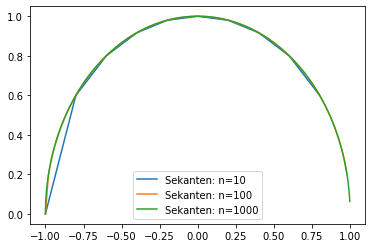

,n-Wert,Resultat,Genauigkeit
0,0,1.570796,Exakt
1,10,1.518524,96.672%
2,100,1.569134,99.894%
3,1000,1.570744,99.997%


In [469]:
# Dies ist nun ein Beispiel der Implementation
# die Genauigkeit wird anhand des Halbkreis-Integrals berechnet

st_results = test_rules_by_appr([['Sekanten', sekanten_trapez_regel]], circle_integral)

st_table = create_results_table(st_results)

display(pd.DataFrame(st_table, columns=["n-Wert", "Resultat", "Genauigkeit"]))

Die Obere Grafik zeigt einen Halbkreis welcher integriert wird. Die verschiedenen Farben stellen die verschiedenen Verläufe bei unterschiedlichen n-Werten dar. Bereits schon ab n = 100 ist der Verlauf der Integration nicht mehr sichtbar da die Genauigkeit schon bei 99.89% liegt. In der allgemeinen Formel wird x_0 und x_n durch 2 geteilt. Ist n aber genügend gross hat das praktisch keinen Einfluss mehr auf die Genauigkeit.

## Tangententrapezregel

Bei der Tangententrapezregel wird die Annäherung ähnlich wie bei der Sekantentrapezregel durch durch Trapeze umgesetzt. Allerdings wird hier als obere schräge Seite die Mitte eines Trapezes genommen [5].

![Tangenten_Trapez_1](img/tangententrapez_1.png)

Der Flächeninhalt des Trapezes kann durch folgende Formel bestimmt werden:

\begin{equation}
    TT_{1} = (b-a) * f(\frac{a+b}{2})
\end{equation}

Um nun die Fläche genauer zu bestimmen wird wieder der Bereich von a -> b in n Streifen aufgeteilt. Um dann die gesamte Fläche zu bestimmen, wird wieder die Fläche jedes einzelnen Trapezes gerechnet und dann daraus die Summe gebildet. Nachfolgend nun die allgemeine Tangententrapezformel:

\begin{equation}
    A = \frac{b-a}{n}  * (f(\frac{x_{0} + x_{1}}{2}) + f(\frac{x_{1} + x_{2}}{2})\;+\;...\;+\;f(\frac{x_{n-1} + x_{n}}{2}))
\end{equation}

Nun folgt die Implementierung dieser Formel in Python.

In [470]:
def tangenten_trapez_regel(f, a, b, n):
    A, x, y = 0, [], []
    steps = (b - a) / n
    for i in range(0, n):
        x.append(a + i * steps)
        y.append(f((x[-1] + x[-1] + steps) / 2))
        #if i > 0 and i != n:
            #y.append(f((x[-1] + x[-2]) / 2))
        #else:
            #y.append(f(x[-1]))
        A += y[-1] * steps
        pass
    return A, x, y

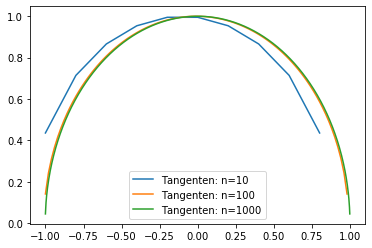

,n-Wert,Resultat,Genauigkeit
0,0,1.570796,Exakt
1,10,1.585994,99.042%
2,100,1.571283,99.969%
3,1000,1.570812,99.999%


In [471]:
# Dies ist nun ein Beispiel der Implementation
# die Genauigkeit wird anhand des Halbkreis-Integrals berechnet

tt_results = test_rules_by_appr([['Tangenten', tangenten_trapez_regel]], circle_integral)

tt_table = create_results_table(tt_results)

display(pd.DataFrame(tt_table, columns=["n-Wert", "Resultat", "Genauigkeit"]))

Die Obere Grafik zeigt einen Halbkreis welcher integriert wird. Die verschiedenen Farben stellen die verschiedenen Verläufe bei unterschiedlichen n-Werten dar. Was auffällt bei n = 10 ist der Verlauf noch extrem verschoben. Doche bereits schon ab n = 100 ist der Verlauf der Integration nicht mehr sichtbar da die Genauigkeit schon bei 99.85% liegt.

## Simpsonsche Regel

Nach den Resultaten von oben sollte die Sekantentrapezregel immer etwas zu wenig und die Tangententrapezregel immer etwas zu viel Fläche angeben. Bei der Simpsonschen Regel ist nun die Idee, dass man diese zwei bekannten Eigenschaften kombiniert. Das heisst man erzeugt ein gewichtetes Mittel. Das Mittel ist gewichtet, da die Tangententrapezregel meist etwas näher am tatsächlichen Wert liegt.

Aus den oben ausgeführten Überlegungen ergibt sich folgende Formel [6]:

\begin{equation}
    S_{n} := \frac{ST_{n} + 2 * TT_{n}}{3}
\end{equation}

Nun folgt die Implementierung dieser Formel in Python.

In [472]:
def simpson_regel(f, a, b, n):
    st_A, st_x, st_y = sekanten_trapez_regel(f, a, b, n)
    tt_A, tt_x, tt_y = tangenten_trapez_regel(f, a, b, n)  
    A, x, y = (st_A + 2 * tt_A) / 3, [], []
    
    for i in range(0, len(st_x)):
        x.append((st_x[i] + 2 * tt_x[i]) / 3)
        
    for i in range(0, len(st_y)):
        y.append((st_y[i] + 2 * tt_y[i]) / 3)
    
    return A, x, y

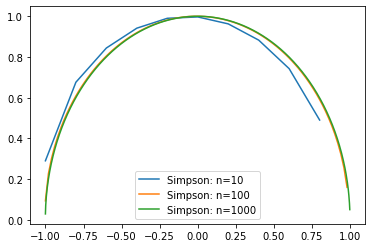

,n-Wert,Resultat,Genauigkeit
0,0,1.570796,Exakt
1,10,1.563504,99.536%
2,100,1.570567,99.985%
3,1000,1.570789,100.0%


In [473]:
# Dies ist nun ein Beispiel der Implementation
# die Genauigkeit wird anhand des Halbkreis-Integrals berechnet

s_results = test_rules_by_appr([['Simpson', simpson_regel]], circle_integral)

s_table = create_results_table(s_results)

display(pd.DataFrame(s_table, columns=["n-Wert", "Resultat", "Genauigkeit"]))

Das Kombinieren der zwei Verfahren hat wie in der Theorie beschrieben funktioniert. Das kombinierte Ergebnis ist von der Genauigkeit in jedem Fall besser als die einzelnen Regeln. Mit dieser Regel ist eine Genauigkeit von 100% bei n = 100 gegeben.

## Vergleich mit verschiedenen Integralen

Um diese verschiedenen Regeln nun vernünftig vergleichen zu können werden diese auf die in der Aufgabenstellung definierten Integrale angewendet.

In [474]:
# Integrationen der Aufgabenstellung
# Werden beim Vergleich verwendet
sin_integral = [0, np.pi, lambda x: np.sin(x)]
sqrt_integral = [-1, 1, lambda x: np.sqrt(1 - x**2)]
square_integral = [0, 1, lambda x: x**2]

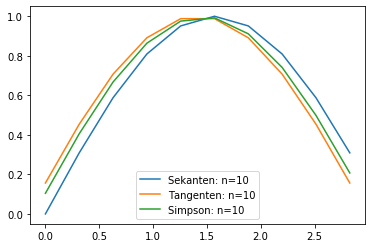

In [475]:
sin_results = test_rules_by_appr([['Sekanten', sekanten_trapez_regel],
                           ['Tangenten', tangenten_trapez_regel],
                           ['Simpson', simpson_regel]], sin_integral, True, [10])
display(sin_results)

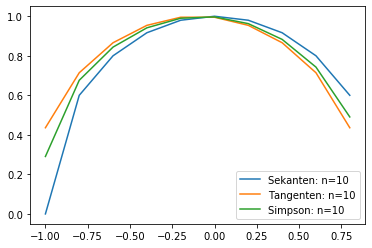

In [476]:
sqrt_results = test_rules_by_appr([['Sekanten', sekanten_trapez_regel],
                           ['Tangenten', tangenten_trapez_regel],
                           ['Simpson', simpson_regel]], sqrt_integral, True, [10])

display(sqrt_results)

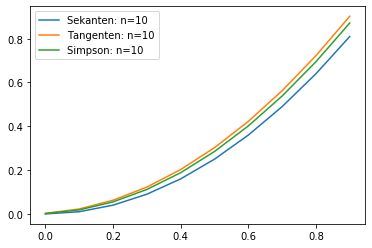

In [477]:
square_results = test_rules_by_appr([['Sekanten', sekanten_trapez_regel],
                           ['Tangenten', tangenten_trapez_regel],
                           ['Simpson', simpson_regel]], square_integral, True, [10])

display(square_results)

Auch in diesem Vergleich zeigt sich die ganz klare Tendenz, dass die Sekantentrapezregel immer etwas darunter, die Tangententrapezregel darüber ist und die Simponsche Regel die beste Annäherung bringt. Somit ist die Theorie und auch die Erkenntnisse aus der Entwicklung mit dem Halbkreis-Integral bestätigt.

## Grenzwert n → ∞

In diesem Abschnitt beschäftigen wir uns nun mit der Überlegung wenn n gegen unendlich geht. Wir haben festgestellt, dass bereits ab n = 1000 eine extrem genaue Annäherung möglich ist. Somit ist meine Vermutung, dass bei n → ∞ die Annäherung für alle drei Regelen in einem exakten Wert endet (Grenzwert). Somit ist für n → ∞ theoretisch egal, welche Regel man verwendet. Diese Behauptung versuche ich nun anhand eines Beispiels mit sympy zu beweisen [7]:

In [478]:
x = sp.symbols('x')

def calc_accuracy(exact, val):
    percent = val / exact if val < exact else exact / val
    return f'{round(percent * 100, 10)}%'

accuracy_comparison = []

sin_limit = sp.N(sp.integrate(sp.sin(x), (x, 0, sp.pi)))
sqrt_limit = sp.N(sp.integrate(sp.sqrt(1 - x**2), (x, -1, 1)))
square_limit = sp.N(sp.integrate(x**2, (x, 0, 1)))

sin_results = test_rules_by_appr([['', sekanten_trapez_regel],
                           ['', tangenten_trapez_regel],
                           ['', simpson_regel]], sin_integral, False, [1000])
accuracy_comparison.append([sin_limit, calc_accuracy(sin_limit, sin_results[0]),
                            calc_accuracy(sin_limit, sin_results[1]),
                            calc_accuracy(sin_limit, sin_results[2])])

sqrt_results = test_rules_by_appr([['', sekanten_trapez_regel],
                           ['', tangenten_trapez_regel],
                           ['', simpson_regel]], sqrt_integral, False, [1000])
accuracy_comparison.append([sqrt_limit, calc_accuracy(sqrt_limit, sqrt_results[0]),
                            calc_accuracy(sqrt_limit, sqrt_results[1]),
                            calc_accuracy(sqrt_limit, sqrt_results[2])])

square_results = test_rules_by_appr([['', sekanten_trapez_regel],
                           ['', tangenten_trapez_regel],
                           ['', simpson_regel]], square_integral, False, [1000])
accuracy_comparison.append([square_limit, calc_accuracy(square_limit, square_results[0]),
                            calc_accuracy(square_limit, square_results[1]),
                            calc_accuracy(square_limit, square_results[2])])

display(pd.DataFrame(accuracy_comparison, columns=["Grenzwert", "Sekanten", "Tangenten", "Simpson"]))

,Grenzwert,Sekanten,Tangenten,Simpson
0,2.00000000000000,99.9999177533%,99.9999588767%,100.000000000000%
1,1.57079632679490,99.9966521252%,99.9990195123%,99.9995377066%
2,0.333333333333333,99.8500500000%,99.9999750000%,99.9500000000%


Die oben stehende Tabelle zeigt nun die Grenzwerte und alle drei Regeln gegenübergestellt. Ich habe als n = 1000 gewählt da sich das bisher als einen sinnvollen Wert herausgestellt hat. Auch habe ich vorher mit n etwas herumprobiert. Und es hat sich gezeigt, dass alle drei Regeln in jedem Fall gegen den Grenzwert konvergiert. Somit kann man eindeutig sagen, dass wenn n → ∞ dann wird der Wert exakt zum Grenzwert.

## Erkenntnisse & Reflexion

Diese Aufgabe war im allgemeinen sehr aufwändig. Doch hat das Umsetzen in Python extrem viel dem Verständnis beigetragen. Bei der Implementation der Formeln habe ich auf ein einziges Integral gesetzt. Und zwar das Halbkreis-Integral. Dadurch konnte ich jederzeit einfach überprüfen, ob der Algorithmus in die richtige Richtigung geht. Auch ist erstaunlich, wie schnell und präzise alle Regeln werden, sobald n etwas grösser wird. Auch hat sich Matplotlib wieder als extrem nützlich erwiesen da anhand dieser Grafiken der Unterschied der verschiedenen Regeln gut sichtbar gemacht werden konnte. Bei Sympy war mir am Anfang nicht ganz klar, wie ich damit etwas beweisen soll. Doch nachdem ich herausgefunden habe, wie die Grenzwerte ermitteln war es plötzlichg ganz logisch. Die Kombination aus der Beschreibung der Theorie und dem praktischen Anwenden mit Python trägt dem allgemeinen Verständnis extrem bei.


‎

‎

‎

‎

‎

‎

## Verweise

* [1]: [https://de.wikipedia.org/wiki/Riemannsches_Integral](https://de.wikipedia.org/wiki/Riemannsches_Integral)
* [2]: [https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/](https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/)
* [3]: [https://de.wikipedia.org/wiki/Trapezregel](https://de.wikipedia.org/wiki/Trapezregel)
* [4]: [https://www.mathe-seite.de/oberstufe/analysis-tiefere-einblicke/naehrungsverfahren/trapezregel/](https://www.mathe-seite.de/oberstufe/analysis-tiefere-einblicke/naehrungsverfahren/trapezregel/)
* [5]: [https://mathepedia.de/Trapezregel.html](https://mathepedia.de/Trapezregel.html)
* [6]: [https://moodle.ffhs.ch/mod/page/view.php?id=3535022&inpopup=1](https://moodle.ffhs.ch/mod/page/view.php?id=3535022&inpopup=1)
* [7]: [https://www.geeksforgeeks.org/python-sympy-integrate-using-limits/](https://www.geeksforgeeks.org/python-sympy-integrate-using-limits/)